# Understanding video game selling trends

Online store Ice sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.<br> 
The main goal of this analysis is to identify patterns that determine whether a game succeeds or not. <br>
This will allow to spot potential big winners and plan advertising campaigns.<br>
Here is the data going back to 2016. <br>
Let’s imagine that it’s December 2016 and store is planning a campaign for 2017.


## Initialization

In [1]:
pip install sidetable

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading all the libraries
import pandas as pd
import numpy as np
import datetime as dt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import sidetable



## Load data

In [3]:
# Load the data file
try:
    games = pd.read_csv('games.csv')
    
except:
    games = pd.read_csv('/datasets/games.csv')
    

## Data overview


In [4]:
# Print the general/summary information
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Print the general/summary information
games.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [6]:
# Print a head of data
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
# Print a tail of data
games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [8]:
# Print a sample of data
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13217,Dream Salon,Wii,2009.0,Misc,0.05,0.00,0.00,0.00,NaN,tbd,E
3493,ATV Offroad Fury: Blazin' Trails,PSP,2005.0,Racing,0.53,0.00,0.00,0.04,63.0,7.8,E
8858,Kids Learn Math: A+ Edition,DS,2011.0,Misc,0.14,0.00,0.00,0.01,NaN,NaN,NaN
15163,Line Rider 2: Unbound,Wii,2008.0,Puzzle,0.02,0.00,0.00,0.00,62.0,6.4,E
7293,Over G Fighters,X360,2006.0,Simulation,0.19,0.01,0.00,0.02,49.0,6,T
10971,Ultimate Mortal Kombat,DS,2007.0,Fighting,0.07,0.01,0.00,0.01,73.0,8.6,M
7993,The Smurfs 2,DS,2013.0,Platform,0.00,0.17,0.00,0.01,NaN,tbd,E
13927,City Builder,Wii,2010.0,Misc,0.04,0.00,0.00,0.00,NaN,tbd,E
12498,Theme Park,DS,2007.0,Simulation,0.00,0.02,0.03,0.00,72.0,7.6,E
7587,Rock Band Track Pack: Classic Rock,PS2,2009.0,Misc,0.10,0.08,0.00,0.03,NaN,tbd,T


In [9]:
# Look at statistics on missing values
games.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


In [10]:
# Check duplicates
games.duplicated().sum()

0

## Data description

* `Name`
* `Platform`
* `Year_of_Release`
* `Genre`
* `NA_sales` North American sales in USD million
* `EU_sales` sales in Europe in USD million
* `JP_sales` sales in Japan in USD million
* `Other_sales` sales in other countries in USD million
* `Critic_Score` maximum of 100
* `User_Score` maximum of 10
* `Rating` ESRB rating. The Entertainment Software Rating Board evaluates a game’s content and assigns an age rating 


### What we see in the data

1. The data has 16715 rows and 10 columns
2. The column names is written using upper and lowercase, for the further convienience it needs to be only lowercase.
3. Some of the columns have missing values:
* `Name`
* `Year_of_Release`
* `Genre`
* `Critic_Score`
* `User_Score`
* `Rating`
4. Values in the column `Genre` is written with capital letter, for the further convienience it needs to be only lowercase.
5. `Year_of_Release` should be converted to integers.
6. `User_Score` has values tbd - 'to be determined', we need to know how many of them we have and decide what to do with them.
7. `User_Score` has numerical values (beside 'tbd') - they are floats representing game's evaluation from users. It should be converted from object to float type.
8. There are zeros in columns describing sales in different regions (`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`) - it means that some games were saled just in one or two regions. 
9. There are no duplicates in the data.

Let's check values in all the columns.

In [11]:
for i in games:
    print(games[i].value_counts())
    print('------------------NEXT-COLUMN-----------------------')

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64
------------------NEXT-COLUMN-----------------------
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN

## Data prerpocessing

First of all let's rename the columns

In [12]:
# renaming columns
games = games.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'release_year',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score' : 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'   
    }
)

In [13]:
games.columns

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### `genre`

Let's change the `genre` values to lowercase.

In [14]:
# lowering genres
games['genre'] = games['genre'].str.lower()
games['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

### `user_score`

Let's look at TBD. 

In [15]:
# see how many 'tbd' we have
games.query('user_score == "tbd"')
len(games.query('user_score == "tbd"'))
round(len(games.query('user_score == "tbd"'))/len(games)*100, 2)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2424

14.5

We see that our `user_score` column contains 2424 values 'tbd', which represents 14.5% of our data. Different years of release of the games that have tbd in `user score` are telling us that it's not new games whose score is yet to be analized or calculated - so these values are actually missing. 

It wouldn't be ideal to delete these rows, as doing so would result in the loss of potentially valuable data from other columns. However, leaving these values as they are will prevent us from converting the column to a float type. To address this issue, we need to replace the 'tbd' label with a numerical value - either NaN or 0. Using 0 isn't a good option since a real game could have a legitimate user score like this. So NaN seems to be the most appropriate replacement for 'tbd'.

Let's replace tbd to NaN in `user_score` and convert it to float type.

In [16]:
games['user_score'] = games['user_score'].replace('tbd', 'NaN')
games['user_score'] = games['user_score'].astype(float)

In [17]:
games['user_score'].dtype

dtype('float64')

## Missing values

Let's look at the missing values.

In [18]:
games.stb.missing(style=True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
release_year,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


### `name`

In [19]:
games.name.isna().sum()
games[games.name.isna()]

2

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are only two rows with missing values in column `name`. There is also missing values in column `genre`. The best solution for us is just remove them - they could interfere with our furter work on data.

In [20]:
games.dropna(subset=['name'], inplace=True)
games.name.isna().sum()

0

### `release_year`

In the collum `release_year` there are 269 missing values. Let's look at them.

In [21]:
games[games.release_year.isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
games.query('name == "Madden NFL 2004"')
games.query('name == "FIFA Soccer 2004"')
games.query('name == "LEGO Batman: The Videogame"')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,sports,0.22,0.08,0.00,0.01,70.0,6.6,E


,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,sports,0.04,0.01,0.00,0.00,82.0,7.9,E


,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,action,1.75,1.01,0.0,0.29,72.0,8.0,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


We see that in some cases games are being released on different platforms. And usually this happens at the same year. So we could fill missing values in `release_year` by grouping by name and taking year out of this data.  

In [23]:
games['release_year'] = games.groupby(['name'])['release_year'].transform(lambda grp: grp.fillna(grp.mode().min()))


In [24]:
games.release_year.isna().sum()
round(games.release_year.isna().sum()/len(games)*100,2)
games[games.release_year.isna()]

146

0.87

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
805,Rock Band,Wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


But we still have 148 missing values in the `release_year` column, less than 1%. And we cannot fill them as we cannot extrapolate this information from the given data. It'll be good to adress this issue to data engineers. 

And sinse it's less than 1% we can delete them. 

In [25]:
games.dropna(subset=['release_year'], inplace=True)
games.release_year.isna().sum()
games.stb.missing()

0

,missing,total,percent
user_score,9027,16567,54.487837
critic_score,8492,16567,51.258526
rating,6699,16567,40.435806
name,0,16567,0.000000
platform,0,16567,0.000000
release_year,0,16567,0.000000
genre,0,16567,0.000000
na_sales,0,16567,0.000000
eu_sales,0,16567,0.000000
jp_sales,0,16567,0.000000


Now it would be appropriate to change the data type in `release_year` from float to integer.

In [26]:
games['release_year'] = games['release_year'].astype(int)
games['release_year'].dtype

dtype('int64')

### `rating`

Let's look at the `rating` column describing ESRB rating of the games. The Entertainment Software Rating Board evaluates a game’s content and assigns an age rating.

In [27]:
games.rating.isna().sum()

6699

In [28]:
games.rating.value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

We see here 8 ratings.
1. E - "everyone", the game is suitable for everyone.
2. E10+ - means that the game is suitable for everyone from age 10 and up.
3. T - "teen", the game is suitable for everyone from age 13 and up.
4. M - "mature", the game is suitable for everyone from age 17 and up.
5. EC - "early childhood", an old category for the games suitable from age 3 and up. It was replaced later by E rating.
6. K-A - "kids to adults", also an old category that was replaced also by E.
7. AO - "adults only", the game is suitable for everyone from age 18 and up.
8. RP - "rating pending", means that the game's rating is not yet assined.

We can combine older ratings with their new names - replace EC and K-A with E.

RP means for us that there is no actual value, rating is not assigned, so we need to treat it accordingly.

As we know Entertainment Software Rating Board evaluates content and assigns an age rating to the game itself regardless of the platform where it was released or other features. 

If we have the same game in different platforms we can take ESRB rating from there.

In [29]:
games['rating'] = games.groupby(['name'])['rating'].transform(lambda grp: grp.fillna(grp.mode().min()))
games.rating.isna().sum()

6262

We cannot fill in the rest of missing values, beacause this information couldn't be extrapolated from our dataset, so we replace them with the "unknown" along with RP.

In [30]:
games['rating'] = games['rating'].replace(['EC', 'K-A'],'E')
games['rating'] = games['rating'].replace('RP', 'unknown')

games['rating'] = games['rating'].fillna('unknown')
games.rating.isna().sum()
games.rating.value_counts()

0

unknown    6264
E          4135
T          3059
M          1645
E10+       1463
AO            1
Name: rating, dtype: int64

In [31]:
games.stb.missing()

,missing,total,percent
user_score,9027,16567,54.487837
critic_score,8492,16567,51.258526
name,0,16567,0.000000
platform,0,16567,0.000000
release_year,0,16567,0.000000
genre,0,16567,0.000000
na_sales,0,16567,0.000000
eu_sales,0,16567,0.000000
jp_sales,0,16567,0.000000
other_sales,0,16567,0.000000


Now we are left with only score's missing values.

The columns containing various types of scores, such as `user_score` and `critic_score`, have an extensive amount of missing data - 54.5% and 51.3%, respectively. Removing these rows is not an option as it would result in the loss of a significant portion of the data. However, attempting to accurately fill in the missing values is also impossible, as we cannot predict the evaluations given by users on different platforms or by critics.

One potential solution is to consult with data engineers to investigate whether data loss occurred somewhere in the pipeline or if the scores data was not collected for some older games. 

For the time being, we will retain the missing values and filter them out in our future analysis.

### `total_sales`

Now let's calculate total sales

In [32]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


During data preprocessing, we encountered several challenges that had to be addressed to ensure the futher analysis could be carried out effectively. 
1. case lowering in colums names and in column `genre`;
2. treating tbd values in column `user_score` as missing values.
3. changing data type in `user_score` to float and in `release_year` to integer.
4. treating missing values in various columns
* `rating` - we filled in part of missing values by grouping data by name - some games were released on different platforms, and knowing that ESRB assigns rating to the game itself despite the platform where it was released, we could take this rating from the same game. Then chose to rename rest of missing values to 'unknown' beacause we cannot fill them in properly - it's not possible to deduce ESRB rating from our data.
* `release_year` - we filled in part of missing values the same way we did it in `rating`. We saw that in some cases games are being released on different platforms. And usually this happens at the same year. So we could fill missing values in `release_year` by grouping by name and taking year out of this data. We chose to delete the rest of missing values in this column since we cannot extrapolate year of release from our data and it was less than 1% of our data.
* `user_score` and `critic_score` - we have an extensive amount of missing data - 54.5% and 51.3%, respectively. We could not remove it as it would result in the loss of a significant portion of the data. However, attempting to accurately fill in the missing values is also impossible, as we cannot predict the evaluations given by users on different platforms or by critics.

## Analyze the data


Let's look how many games were released in different years

In [33]:
games_years = games.groupby('release_year')['name'].count().reset_index()
games_years

,release_year,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


And visualize this data

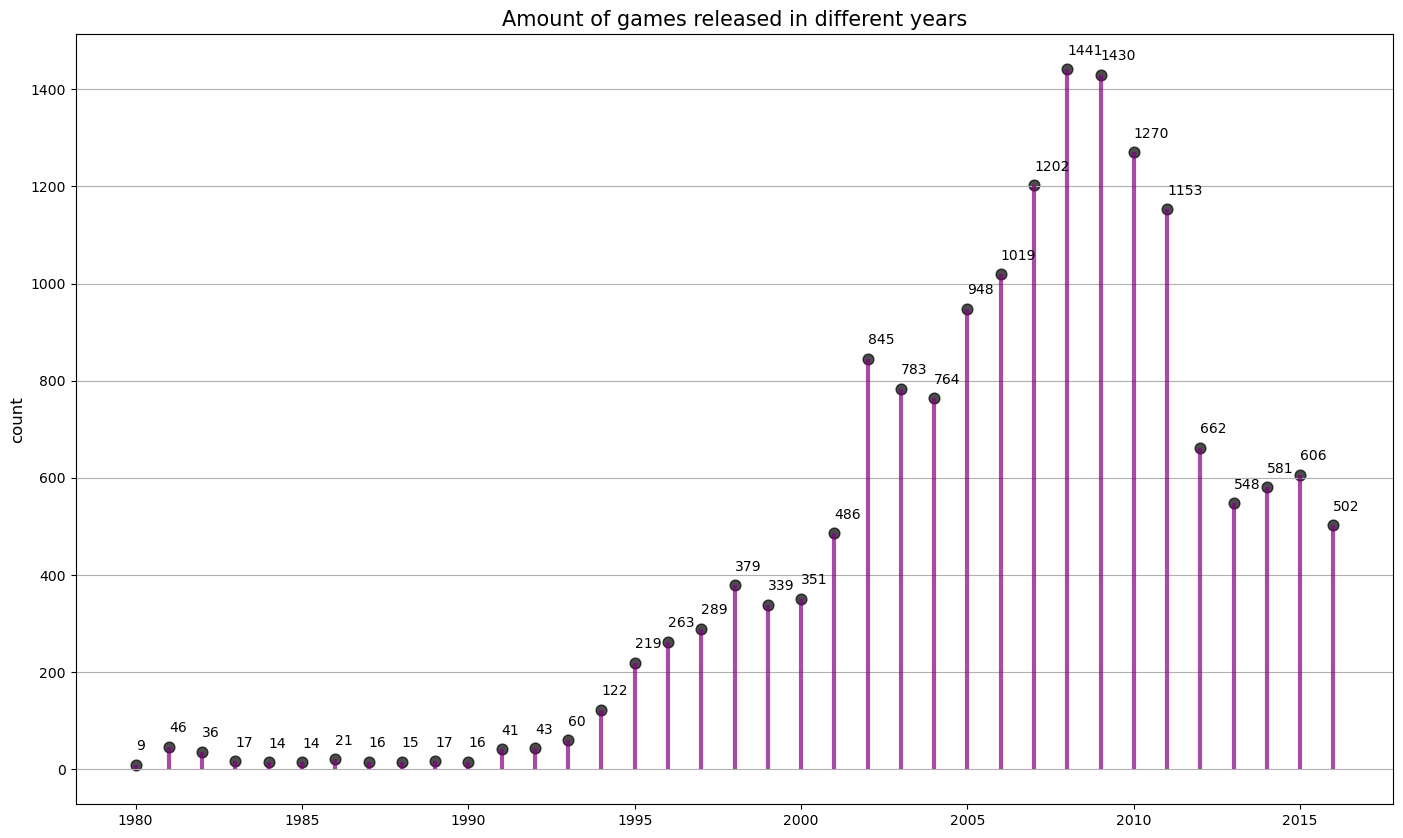

In [34]:
fig, ax = plt.subplots(figsize = (17,10))
ax.grid(axis='y')
ax.vlines(x=games_years.release_year, ymin=0, ymax=games_years.name, color = 'purple', linewidth=3, alpha = 0.7)
ax.scatter(x=games_years.release_year, y=games_years.name, s=60, color='black', alpha = 0.7)
ax.set_title('Amount of games released in different years', fontdict={'size':15})

ax.set_ylabel('count',fontdict={'size':12})
for row in games_years.itertuples():
    ax.text(row.release_year, row.name+30,s=row.name)
plt.show();

Here we can observe how the number of games has evolved throughout the years, and we can identify four distinct phases:

* From 1980 to 1994, the gaming industry was in its early stages of development and number of games was relatively low.
* From 1995 to 2001, number of games began to increase steadily.
* From 2002 to 2011, there was a significant peak.
* From 2012 to 2016, number of games decreased by half and remained relatively stable for several years.


To make a prognosis for 2017, it would be reasonable to refer to data from the closest phase, which would be starting from the year 2012. 

However, for a more comprehensive analysis, it would be beneficial to examine a broader time frame to identify additional patterns and insights - we'll take the data starting from 2002.

## Platform profitability

Now let's look at how sales varied from platform to platform and visualize it.

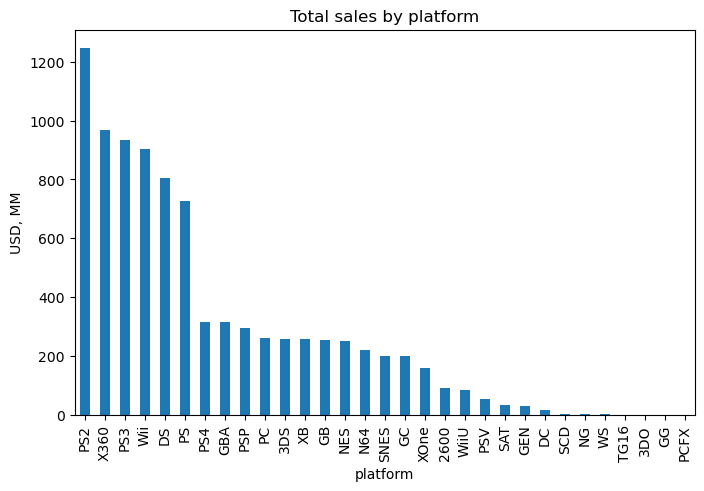

In [35]:
total_sales_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_sales_platform
total_sales_platform.plot(kind='bar', figsize=(8,5))
plt.title('Total sales by platform')
plt.ylabel('USD, MM')
plt.show();

By looking at the plot we can spot six leaders - PS2, X360, PS3, Wii, DS, PS. Let's look at their sales starting with 2002. 

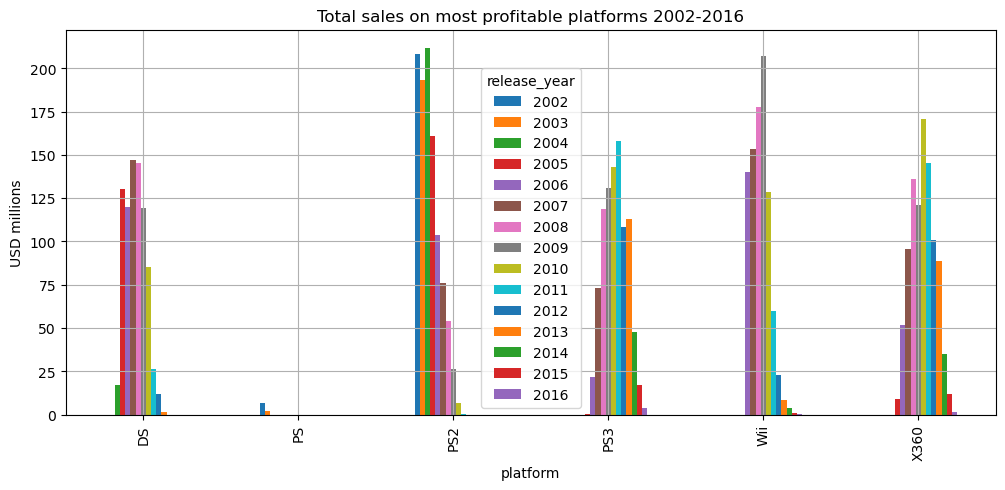

In [36]:
games_top6 = games.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS") and release_year >=2002')

games_top6.pivot_table(index = 'platform',
                               columns = 'release_year', 
                               values = 'total_sales', 
                               aggfunc = 'sum').plot(kind = 'bar', figsize=(12,5), grid=True)
plt.title('Total sales on most profitable platforms 2002-2016')
plt.ylabel('USD millions')
plt.show();

We see that the highest sales show the PS2 and Wii - over 200 millions on the peak years, but it looks like these peaks are long gone. We need to see how their total sales changed over the years starting from 2002 till 2016.

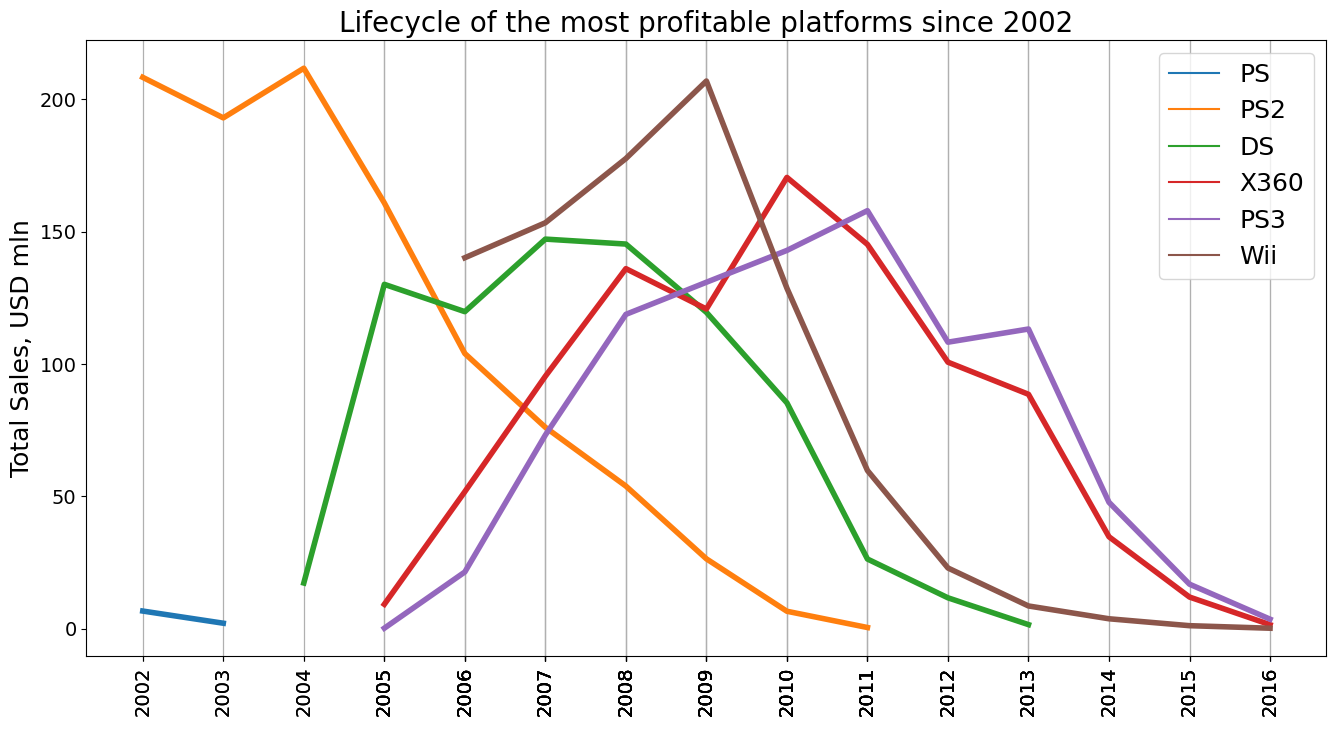

In [37]:
platforms_from_2002 = games.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS") and release_year >=2002'
                                 ).groupby(['platform', 
                                            'release_year'])['total_sales'].sum().reset_index().sort_values(by = 'release_year')

plt.figure(figsize=(16,8))
ax = sns.lineplot(data=platforms_from_2002, x="release_year", y="total_sales",hue="platform", linewidth=4)
ax.grid(axis='x')
ax.set_title('Lifecycle of the most profitable platforms since 2002', fontsize=20)
legend = ax.legend(fontsize=18)
ax.set_ylabel('Total Sales, USD mln', fontsize = 18)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(' ')
ax.set_xticks(platforms_from_2002.release_year)
ax.set_xticklabels(platforms_from_2002.release_year, rotation=90, fontsize=14);


What is the overview of the sales trends in the gaming industry for the most profitable platforms?

We can observe the following:

* PS sales already started declining at 2002.
* PS2 sales peaked in 2006, but have been decreasing since then.
* DS had a run from 2004 to 2013, with 4 years of high sales from 2005 to 2009.
* X360 had a run from 2005 to 2016, with 5 years of high sales from 2007 to 2012.
* PS3 had a run from 2005 to 2016, with 5 years of high sales from 2008 to 2013.
* Wii had a run from 2006 to 2016, with 3 years of high sales from 2007 to 2010.

The most profitable platforms have a lifespan of around 9-11 years, with 3-5 years of high sales. It usually takes from 1 to 3 years to reach high sales since the start of the platform. 

However, it appears that the most profitable platforms are either no longer available or have significantly decreased in sales.

To gain a better understanding of the general trend and lifespan of all platforms, we need to create a similar graph  for all platforms starting from the time when number of games increased significantly (2002). 

Before doing that, we must determine the average lifespan for all platforms, which will help us understand how long it typically takes for new platforms to appear and old ones to fade.


In [38]:
games_from_2002 = games.query('release_year >=2002')
games_from_2002 = games_from_2002.groupby(['platform'])['release_year'].agg(['min','max']).reset_index()
games_from_2002['age'] = games_from_2002['max']-games_from_2002['min']
games_from_2002.sort_values(by='min')
games_from_2002['age'].median()

,platform,min,max,age
8,PS2,2002,2011,9
1,DC,2002,2008,6
3,GBA,2002,2007,5
4,GC,2002,2007,5
5,N64,2002,2004,2
6,PC,2002,2016,14
7,PS,2002,2003,1
16,XB,2002,2008,6
2,DS,2004,2013,9
11,PSP,2004,2015,11


6.0

The average lifecycle of a platform is 6 years, so we should focus on the period starting from 6 years ago to identify new trending platforms. 

Additionally, we should keep in mind our previous findings that the number of games decreased by half in 2012 compared to the previous period, and remained relatively stable for several years thereafter. 

This information can help us identify any shifts in the gaming industry and the emergence of new platforms or trends.

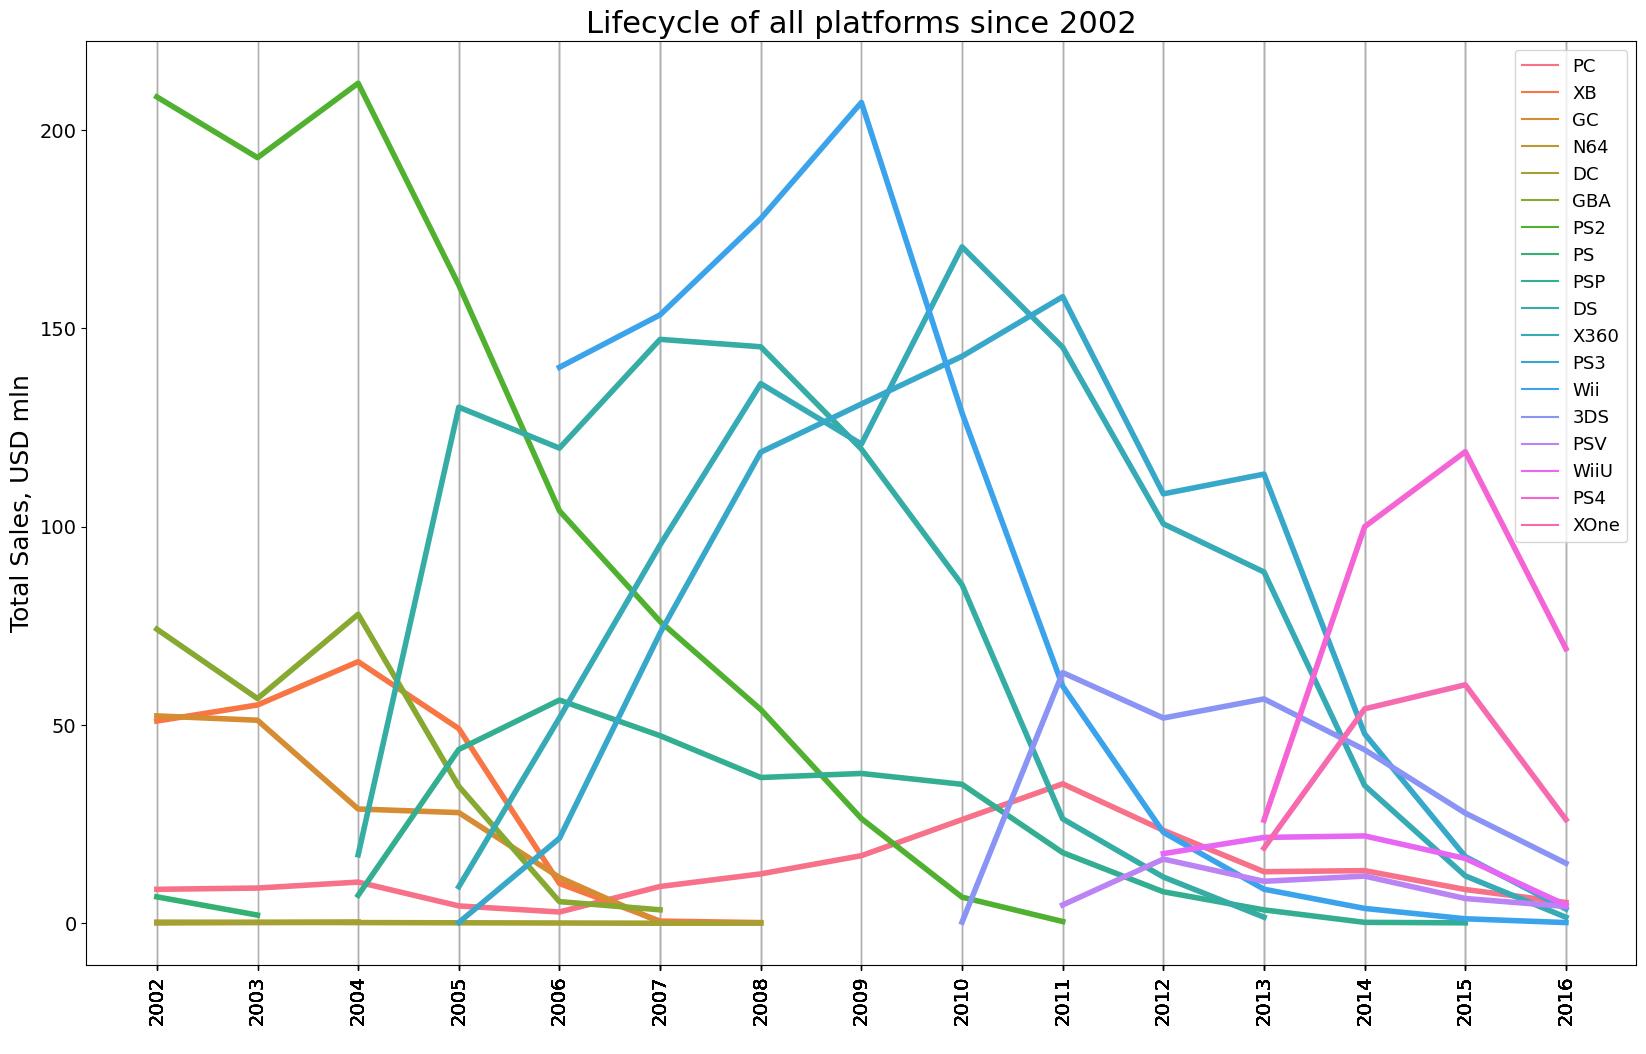

In [39]:
all_platforms_lifecycle = games.query('release_year >=2002').groupby(['platform', 
                                   'release_year'])['total_sales'].sum().reset_index().sort_values(by = 'release_year')

plt.figure(figsize=(20,12))
ax = sns.lineplot(data=all_platforms_lifecycle, x="release_year", y="total_sales",hue ="platform", linewidth=4)
ax.grid(axis='x')
ax.set_title('Lifecycle of all platforms since 2002', fontsize=22)
legend = ax.legend(fontsize=13)
ax.set_ylabel('Total Sales, USD mln', fontsize = 18)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel(' ')
ax.set_xticks(all_platforms_lifecycle.release_year)
ax.set_xticklabels(all_platforms_lifecycle.release_year, rotation=90, fontsize=14);


We should focus our attention on the right side of the graph, describing recent years, where we can spot several platforms that are either increasing or decreasing in sales. 

However, we should keep in mind that the data for 2016 may be incomplete since we do not have the full sales data for that year. 

To make a prognosis for 2017, we should focus on more recent years. Looking back six years may not be sufficient to identify emerging platforms since it typically takes between 1 to 3 years for a new platform to reach its peak in sales. This observation is supported by the graph, which shows that XOne and PS4 started to rise in 2013, while 3DS and WiiU, which entered the market in 2010 and 2011 respectively, were already fading.


Let's take the data starting from 2013 to look at platforms that are leading in sales recently. 
And identify which ones are growing or shrinking.

In [40]:
games_from_2013 = games.query('release_year >=2013')

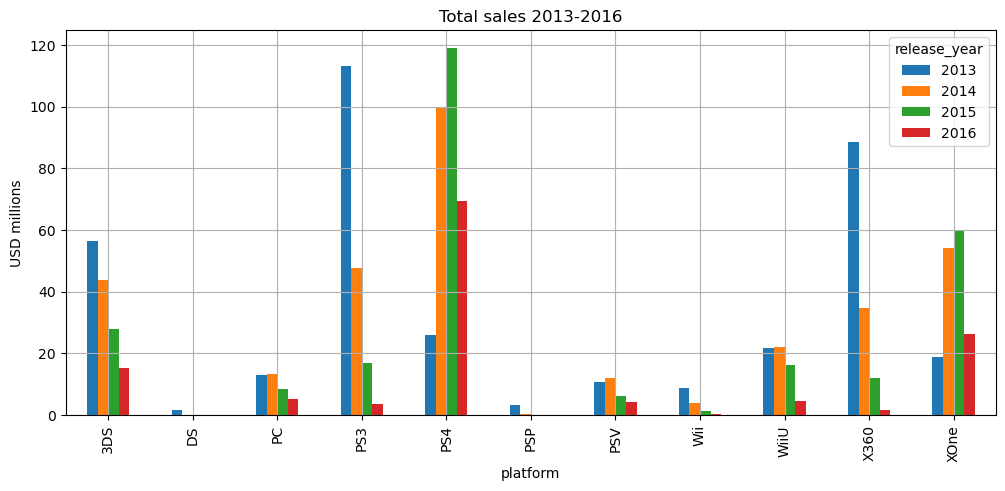

In [41]:
games_from_2013.pivot_table(index = 'platform',
                               columns = 'release_year', 
                               values = 'total_sales', 
                               aggfunc = 'sum').plot(kind = 'bar', figsize=(12,5), grid=True)
plt.title('Total sales 2013-2016')
plt.ylabel('USD millions')
plt.show();

From this graph we can see 11 platforms and the leaders in sales are PS4, PS3, X360, 3DS and XOne. 

But only two of these  platforms - PS4 and XOne -  were showing growth in total sales from 2013 and up to 2015 (remember that data for 2016 is incomplete), the rest of them show a fall.


Let's take a look at the distribution of games sales by each platform - this is the way to see which platform's games are the most profitable.

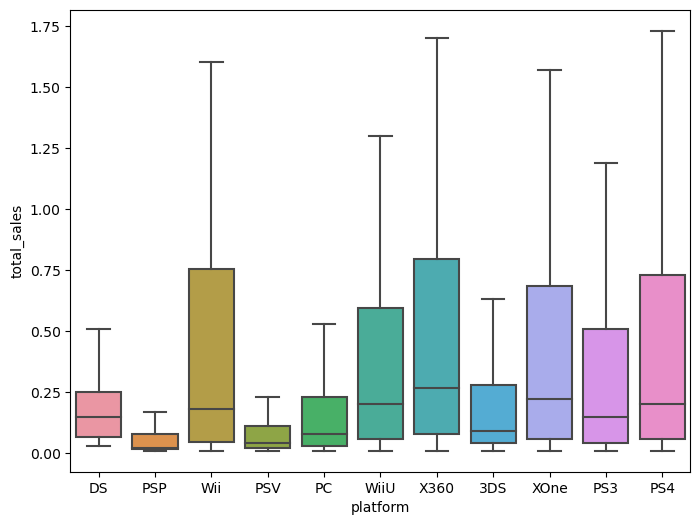

In [42]:
grouped = games_from_2013.groupby(['platform','name'])['total_sales'].sum().reset_index()

order = grouped.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']

plt.figure(figsize=(8,6))
sns.boxplot(x='platform',y='total_sales',data=grouped,order=order, showfliers = False);


Our platforms were arranged in order of profitability, from the least profitable platform (with a smaller total amount of sales, DS platform) to the most profitable one (with a larger total amount of sales, PS4 platform). However, upon examining the boxplots, it appears that the platform with the highest total sales does not have the most profitable games.

To determine which platform has more profitable games, we need to analyze the sales distribution of all games sold on each platform. 

This involves comparing the medians and interquartile ranges of each platform's game sales, which will reveal the platform that sells games generating more revenue.

We see here that X360 and XOne have higher median sales so they have more profitable games than our total sales leader PS4. 

Let's take a look at the platforms median game sale.

In [43]:
platform_median = grouped.groupby(['platform'])['total_sales'].median().reset_index().sort_values(
    by='total_sales', ascending=False)
platform_median


,platform,total_sales
9,X360,0.265
10,XOne,0.220
4,PS4,0.200
8,WiiU,0.200
7,Wii,0.180
1,DS,0.150
3,PS3,0.150
0,3DS,0.090
2,PC,0.080
6,PSV,0.040


### Conclusions

Indeed, X360 has the highest median value of 265,000 USD, which means that 50% of games sold on this platform generate more revenue than this amount. However, it's important to note that the sales trend for X360 is currently decreasing, as it's an old platform whose peak sales period has passed. Therefore, even though X360 has the highest median value, it wouldn't be the best choice to invest in games for this platform.


On the other hand, XOne has the second-best median value and is one of the platforms with rising sales. These two factors make it a good option for choosing games to sell.


Third and fourth median values are for WiiU and PS4. We remember that PS4 is not only rising in sales but also generates biggest amount of sales - so games from this platform are potential winners.


WiiU's sales have never been as high as previously discussed platforms, and its tendency right now is decrease in sale but it's still a live platform. So the in the purchase forecast it should be taken into consideration.

## Score's impact

Let's take a look at how user and professional reviews affect sales for platforms. We will begin by analyzing the PS4 as it's not only currently rising in sales but also generates biggest amount of sales and games on this platform is quite profitable. 

Let's filter our recent data so it would contain only valuable information. We remember, that lots of games didn't have user or critic score (more than 50% (!) of whole dataframe), so we need to filter them out.

But we cannot forget about them - this analysis is made wihout considerable part of the data. Analysis could lead to very different conclusoins if the data was whole.


In [44]:
games_PS4_with_nan = games_from_2013[games_from_2013.platform == "PS4"]
games_PS4 = games_from_2013[(games_from_2013.critic_score.notna()) 
                            & (games_from_2013.user_score.notna()) 
                            & (games_from_2013.platform == "PS4")]

round(len(games_PS4)/len(games_PS4_with_nan)*100, 2)

games_PS4_scatter = games_PS4[['critic_score', 'user_score', 'total_sales']]
games_PS4_scatter.corr()

63.52

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


#### We are left with 63.5% of data on PS4 platform after we filter out all of NaNs.

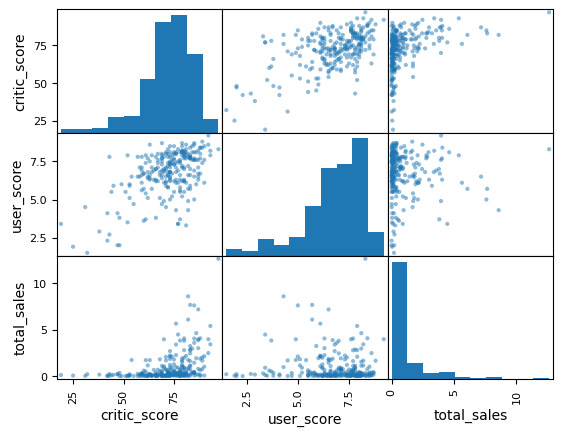

In [45]:
pd.plotting.scatter_matrix(games_PS4_scatter);

Here's what we see:

1. While the correlation between critic score and total sales on PS4 is quite low (40%), it is still present and positive. This suggests that in some cases higher score could be associated with higher sales. 
2. The correlation between critic score and user score is stronger, at almost 56%. This indicates that a higher critical rating is associated with better user ratings.
3. And there is no correlation between user score and total sales whatsoever.

Next, let's examine how these correlations hold up on XOne, which is our second top choice for a platform to consider while planing our games purchases in 2017.

In [46]:
games_XOne_with_nan = games_from_2013[games_from_2013.platform == "XOne"]
games_XOne = games_from_2013[(games_from_2013.critic_score.notna()) 
                            & (games_from_2013.user_score.notna()) 
                            & (games_from_2013.platform == "XOne")]

round(len(games_XOne)/len(games_XOne_with_nan)*100, 2)

games_XOne_scatter = games_XOne[['critic_score', 'user_score', 'total_sales']]
games_XOne_scatter.corr()

66.8

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
total_sales,0.410422,-0.094003,1.000000


#### We are left with 66.8% of data on XOne platform after we filter out all of NaNs.

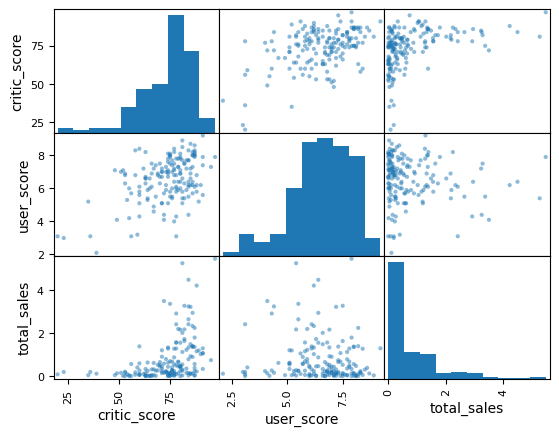

In [47]:
pd.plotting.scatter_matrix(games_XOne_scatter);

Our findings for XOne are pretty similar to the previous one for PS4
1. There is also a low correlation between critic score and total sale (41%).
2. The correlation between critic score and user score is weaker than it was for PS4, but close - 47%.
3. There is no correlation between user score and total sales.

Next, let's examine how these correlations hold up on WiiU, which is our third choice for a platform to consider when purchasing games in 2017.

In [48]:
games_WiiU_with_nan = games_from_2013[games_from_2013.platform == "WiiU"]
games_WiiU = games_from_2013[(games_from_2013.critic_score.notna()) 
                            & (games_from_2013.user_score.notna()) 
                            & (games_from_2013.platform == "WiiU")]

round(len(games_WiiU)/len(games_WiiU_with_nan)*100, 2)

games_WiiU_scatter = games_WiiU[['critic_score', 'user_score', 'total_sales']]
games_WiiU_scatter.corr()

60.0

,critic_score,user_score,total_sales
critic_score,1.000000,0.721313,0.379504
user_score,0.721313,1.000000,0.408692
total_sales,0.379504,0.408692,1.000000


#### We are left with 60% of data on XOne platform after we filter out all of NaNs.

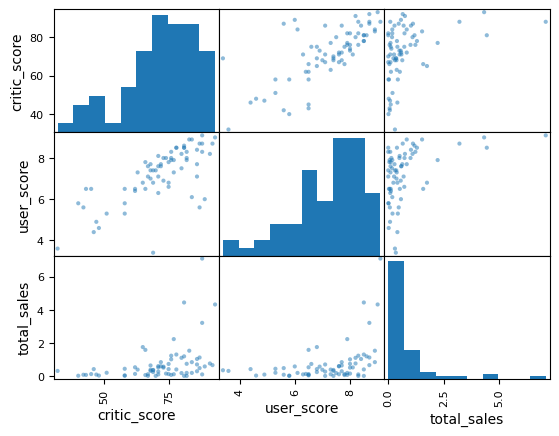

In [49]:
pd.plotting.scatter_matrix(games_WiiU_scatter);

The results of the WiiU platform analysis are surprising in the following ways:

1. The correlation between critic score and user score is the strongest out of all previously analyzed platforms, standing at an impressive 72%.
2. The correlation between critic score and total sales, while still present, is the weakest compared to other platforms analyzed, at 37%.
3. A correlation between user score and total sales is also present, although not particularly strong at 40%.

### Conclusions

It has become apparent that the impact of different scores on game sales is relatively weak, if present at all. The correlation between critic score and total sales on three analyzed platforms (PS4, XOne, and WiiU) is similar, ranging between 38% and 41%. However, this level of correlation cannot be considered a significant factor for sales prognosis.

Despite this, the positive correlation between critic score and total sales could still be considered as an additional factor when choosing games for sale in 2017. 

On the other hand, the correlation between user score and total sales is absent for two out of the three analyzed platforms (PS4 and XOne), and relatively weak for WiiU (40%). While this correlation cannot be considered an essential factor in sales prognosis, it is still worth keeping in mind.

It is crucial to note that all conclusions are based on approximately 60% of the available data on these platforms, as a significant amount of data has missing values for both types of scores. Analysis could lead to very different conclusoins if the data was whole.


What factors can we also take into account if we want to make a good prognosis for sales in 2017? Game's genre could be one of them.

## Profitability by genre

Let's take a look at the general distribution of games by genre.

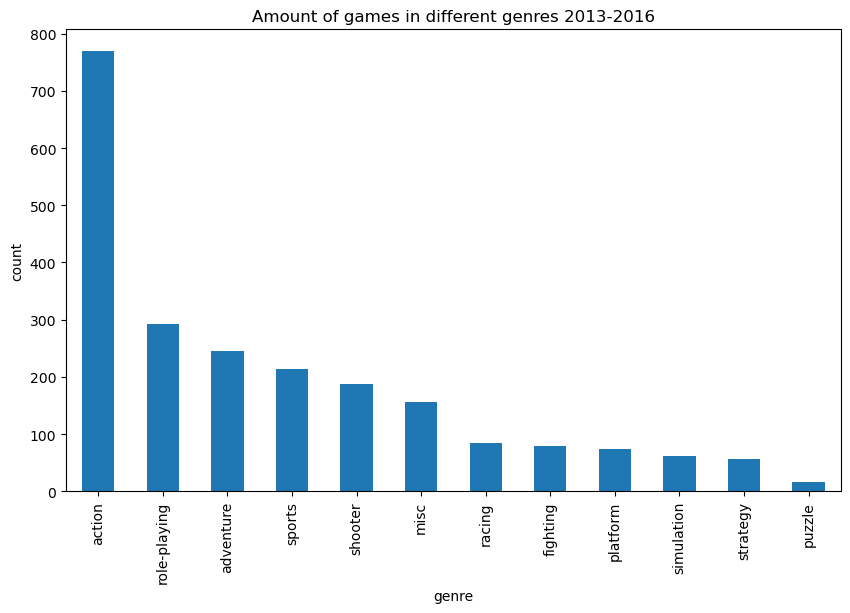

In [50]:
games_from_2013.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

plt.title('Amount of games in different genres 2013-2016')
plt.ylabel('count')
plt.show();

We see here that action games are leading in terms of sold quantity - their number is almost reaching 800. Then followed by role-playing, adventure, sports and shooter.

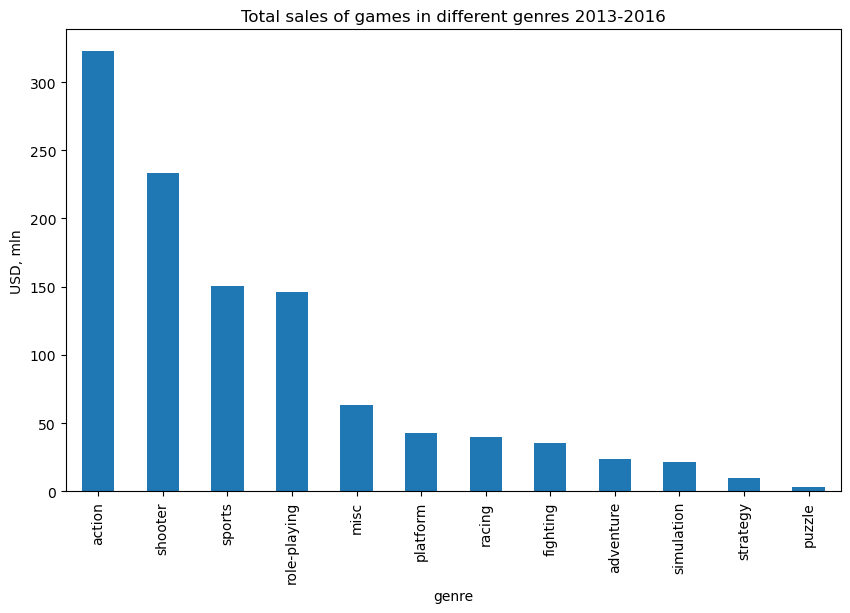

In [51]:
games_from_2013.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

plt.title('Total sales of games in different genres 2013-2016')
plt.ylabel('USD, mln')
plt.show();

If we look at total sales grouped by genre the picture is different.

Action games are still leading, but shooter takes a second place, followed by sports, role-playing and misc. 

Let's take a look at the distribution of games sales by each genre - this is the way to see the games of which genre are the most profitable - as we already did it with platforms. But this time we sort genres in the graph by median value of their sales.

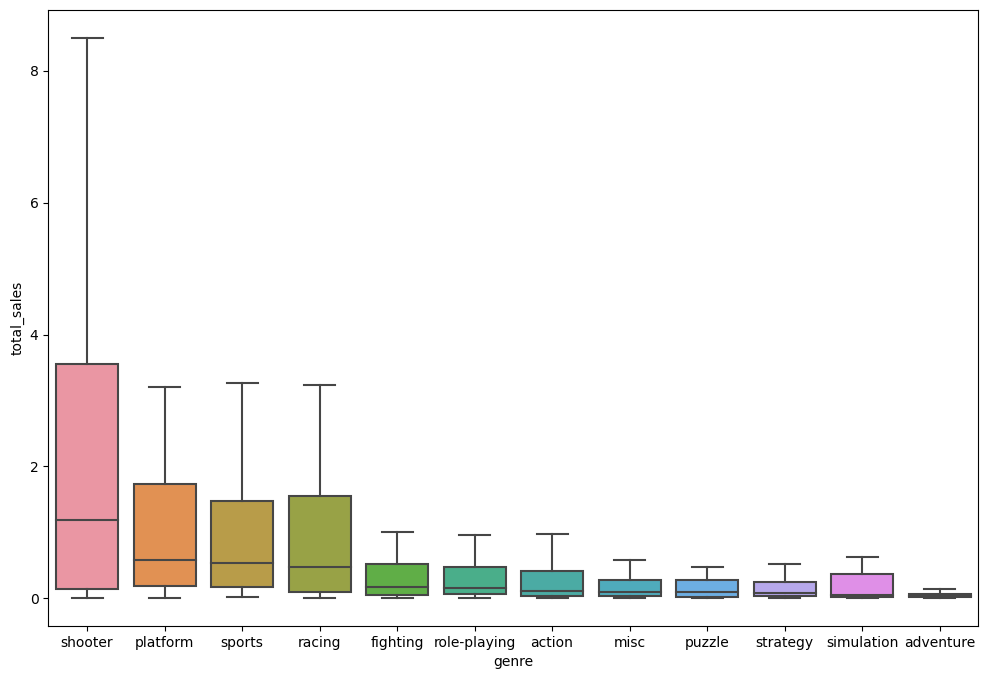

In [52]:
grouped_genre = games_from_2013.groupby(['genre','name'])['total_sales'].sum().reset_index()

order = grouped_genre.groupby(['genre'])['total_sales'].median().reset_index().sort_values(by='total_sales', 
                                                                                           ascending=False)['genre']

plt.figure(figsize=(12,8))
sns.boxplot(x='genre',y='total_sales',data=grouped_genre,order=order, showfliers = False);


In [53]:
median_genre = grouped_genre.groupby(['genre'])['total_sales'].median().reset_index().sort_values(by='total_sales', 
                                                                                           ascending=False)
median_genre

,genre,total_sales
8,shooter,1.190
4,platform,0.580
10,sports,0.530
6,racing,0.470
2,fighting,0.170
7,role-playing,0.160
0,action,0.110
3,misc,0.090
5,puzzle,0.090
11,strategy,0.085


### Conclusions

Upon examining the quantity of games sold in various genres, it is evident that action games are leading the pack, with almost 800 titles sold. This is followed by role-playing, adventure, sports, and shooter games.

However, when looking at the total sales per genre, the rankings are different. Action games remain in first place, with shooter games taking second place, followed by sports, role-playing, and miscellaneous games.

But what we really want to know is which genres are the most profitable. Based on the data, the shooter genre is the clear winner, with a median value that is twice as high as the next genre, at almost 1.2 million USD. This indicates that shooter games are the most profitable.
Additionally, Shooter games are the second in terms of total sales.
Even though the number of shooter games is relatively small their profitability is impressive - we can rely on it when making a prognosis.

Platform games come in second place after Shooter, but their number and amount of sales are relatively small.

Following platform, the sport genre is next with a median value of 0.53 million and it is included in the top 5 for both the number of sold games and total sales - it would be a good idea to consider it as a factor for our prognosis.

And let's not forget about action games - even tough their profitability is not the greatest, it's still most popular genre that generates more revenue.


Now let's look how vary sales in different regions

## North American Sales

First we need to make a dataframe that contains only relevant data from recent period.

In [54]:
na_sales_platform = games_from_2013.groupby(['platform']
                                           )['na_sales'].sum().reset_index().sort_values(by='na_sales', 
                                                                                         ascending=False)


na_sales_platform['na_sales'].sum()
na_sales_platform['shares'] = round(na_sales_platform['na_sales']/na_sales_platform['na_sales'].sum(),3)
na_sales_platform = na_sales_platform.set_index('platform')
na_sales_platform.head()


437.78999999999996

,na_sales,shares
platform,,
PS4,108.74,0.248
XOne,93.12,0.213
X360,81.66,0.187
PS3,63.50,0.145
3DS,38.20,0.087


Let's look at the market shares of different platforms in North America.

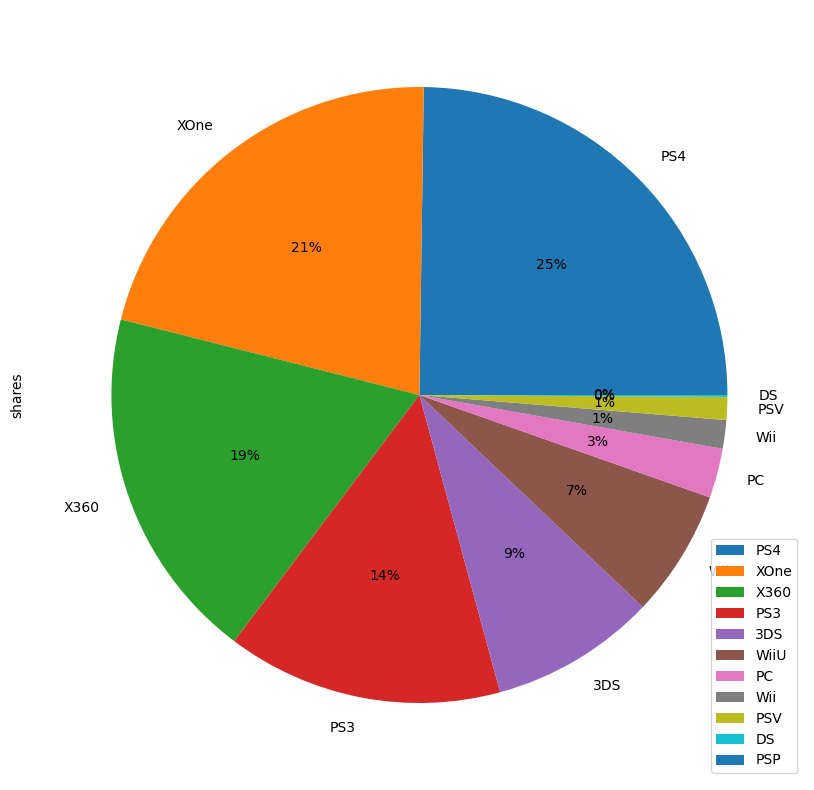

In [55]:
na_sales_platform.plot(kind='pie', y='shares', figsize=(12,10), autopct='%1.0f%%');

PS4 is currently the sales leader with a revenue of 108.74 million USD and a market share of almost 25%, while the XOne follows closely behind with 93.12 million USD in revenue and a market share of 21.3%. 

This information should be taken into consideration when making a forecast for 2017 and planning marketing campaign for Notrh America.

Now let's focus on genres popular in North America. And see their shares.

In [56]:
na_sales_genre = games_from_2013.groupby(['genre']
                                           )['na_sales'].sum().reset_index().sort_values(by='na_sales',  
                                                                                         ascending=False)
                                                                                         

na_sales_genre['na_sales'].sum()
na_sales_genre['shares'] = na_sales_genre['na_sales']/na_sales_genre['na_sales'].sum()
na_sales_genre = na_sales_genre.set_index('genre')

na_sales_genre.head()                                                                                     

437.7899999999999

,na_sales,shares
genre,,
action,126.13,0.288106
shooter,109.74,0.250668
sports,65.27,0.149090
role-playing,46.40,0.105987
misc,27.49,0.062793


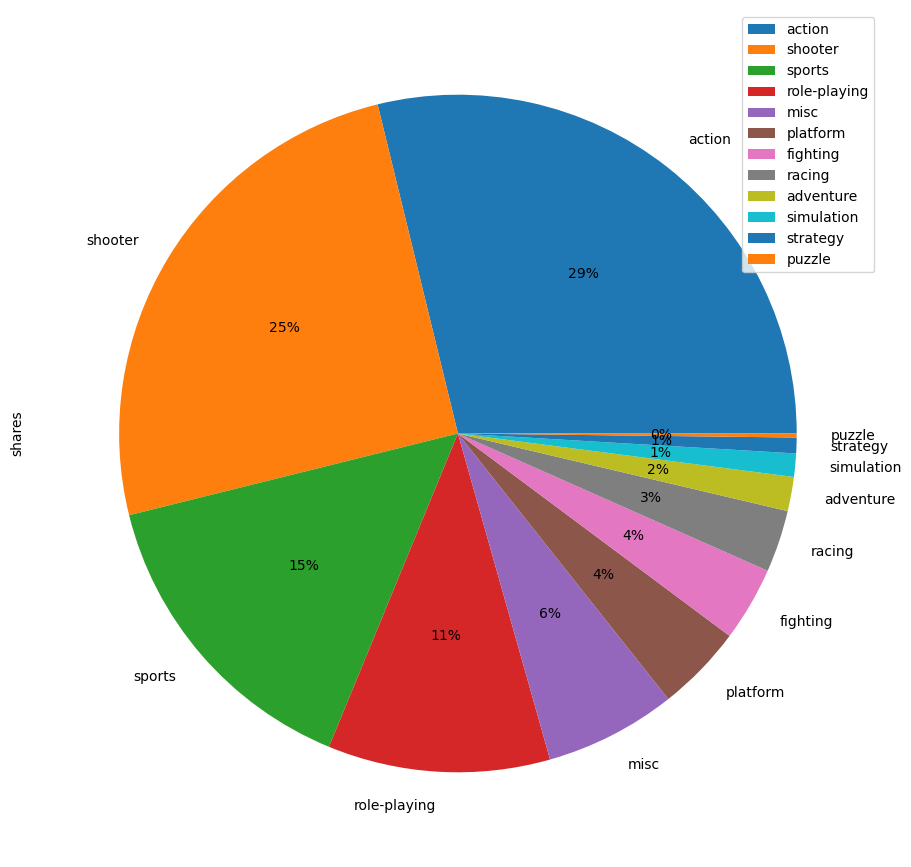

In [57]:
na_sales_genre.plot(kind='pie', y='shares', figsize=(12,11), autopct='%1.0f%%');

Action an shooter are leading game genres with a big gap between them and following ganres.

Let's do the same for the European and Japaneese market.

## European sales

In [58]:
eu_sales_platform = games_from_2013.groupby(['platform']
                                           )['eu_sales'].sum().reset_index().sort_values(by='eu_sales', 
                                                                                         ascending=False)


eu_sales_platform['eu_sales'].sum()
eu_sales_platform['shares'] = round(eu_sales_platform['eu_sales']/eu_sales_platform['eu_sales'].sum(),3)
eu_sales_platform = eu_sales_platform.set_index('platform')
eu_sales_platform.head()

392.71000000000004

,eu_sales,shares
platform,,
PS4,141.09,0.359
PS3,67.81,0.173
XOne,51.59,0.131
X360,42.52,0.108
3DS,30.96,0.079


PS4 sales in Europe is 141 millions USD, almost 36% of the european market share. The next one goes after big gap - PS3 sales in Europe is 67.81 millions USD with 17.3% market share.

The top five platfoms are the same as in North America, just arranged in a different order.

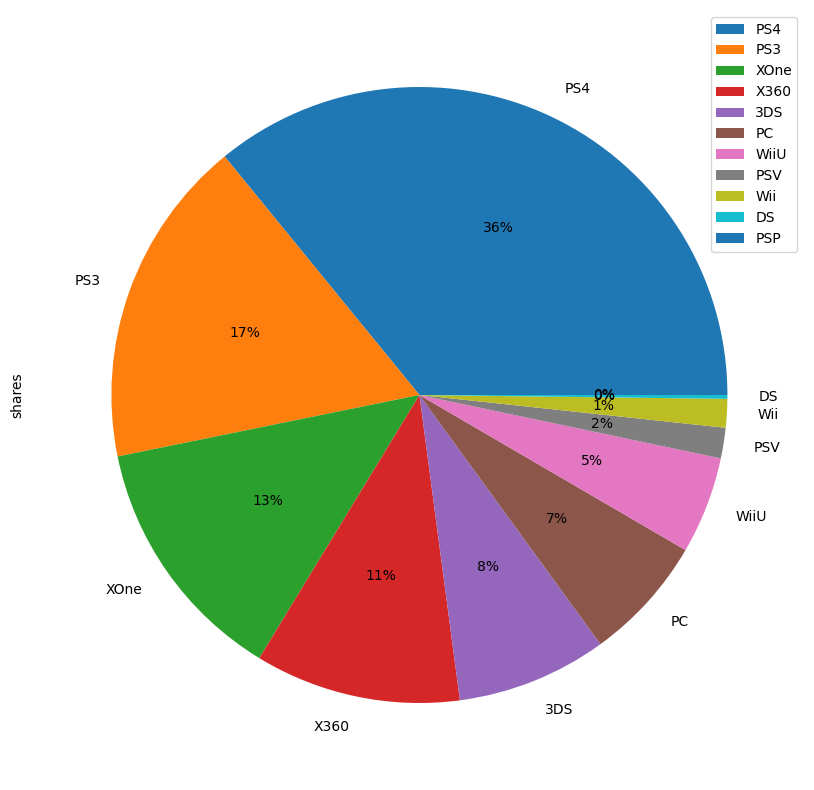

In [59]:
eu_sales_platform.plot(kind='pie', y='shares', figsize=(12,10), autopct='%1.0f%%');

In [60]:
eu_sales_genre = games_from_2013.groupby(['genre']
                                           )['eu_sales'].sum().reset_index().sort_values(by='eu_sales', 
                                                                                         ascending=False)


eu_sales_genre['eu_sales'].sum()
eu_sales_genre['shares'] = round(eu_sales_genre['eu_sales']/eu_sales_genre['eu_sales'].sum(),3)
eu_sales_genre = eu_sales_genre.set_index('genre')
eu_sales_genre.head()

392.7100000000001

,eu_sales,shares
genre,,
action,118.61,0.302
shooter,87.86,0.224
sports,60.52,0.154
role-playing,36.97,0.094
racing,20.19,0.051


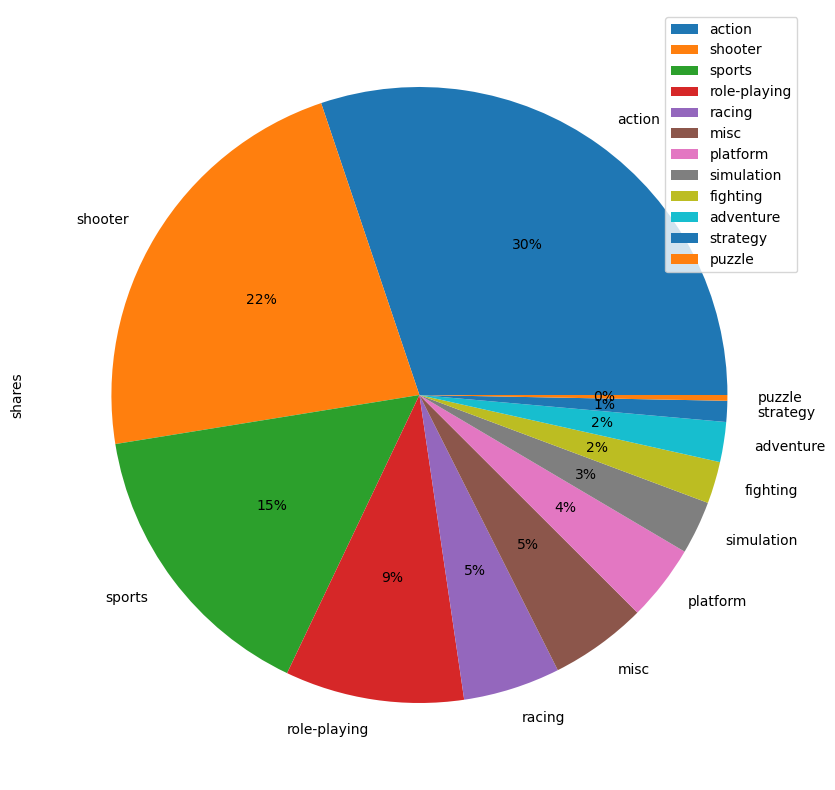

In [61]:
eu_sales_genre.plot(kind='pie', y='shares', figsize=(12,10), autopct='%1.0f%%');

Action an shooter are also leading game genres with 30% and 22% of EU market shares respectively.

## Japanese sales

In [62]:
jp_sales_platform = games_from_2013.groupby(['platform']
                                           )['jp_sales'].sum().reset_index().sort_values(by='jp_sales', 
                                                                                         ascending=False)


jp_sales_platform['jp_sales'].sum()
jp_sales_platform['shares'] = round(jp_sales_platform['jp_sales']/jp_sales_platform['jp_sales'].sum(),3)
jp_sales_platform = jp_sales_platform.set_index('platform')
jp_sales_platform.head()

141.02

,jp_sales,shares
platform,,
3DS,67.81,0.481
PS3,23.35,0.166
PSV,18.59,0.132
PS4,15.96,0.113
WiiU,10.88,0.077


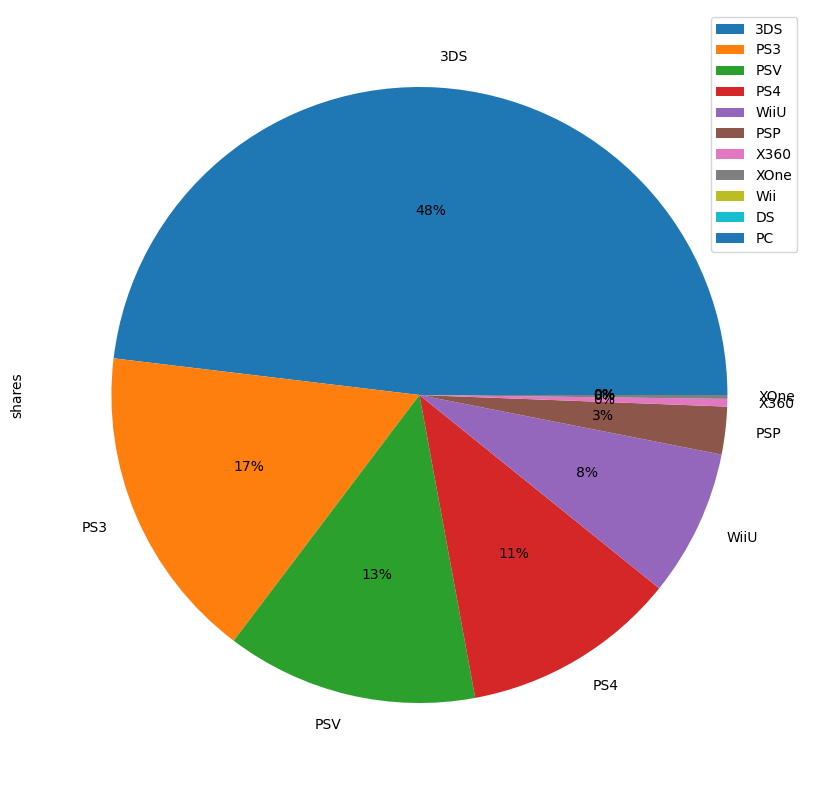

In [63]:
jp_sales_platform.plot(kind='pie', y='shares', figsize=(12,10), autopct='%1.0f%%');

Top 5 platfoms in Japan look very different! 

Almost half (48%) of the market is taken by 3DS platform with 67.81 millions USD! Then goes PS3 with 23.35 millions USD and 16.6% of the market share.

In [64]:
jp_sales_genre = games_from_2013.groupby(['genre']
                                           )['jp_sales'].sum().reset_index().sort_values(by='jp_sales', 
                                                                                         ascending=False)


jp_sales_genre['jp_sales'].sum()
jp_sales_genre['shares'] = jp_sales_genre['jp_sales']/jp_sales_genre['jp_sales'].sum()
jp_sales_genre = jp_sales_genre.set_index('genre')
jp_sales_genre.head()

141.02000000000004

,jp_sales,shares
genre,,
role-playing,51.04,0.361934
action,40.49,0.287122
misc,9.44,0.066941
fighting,7.65,0.054248
shooter,6.61,0.046873


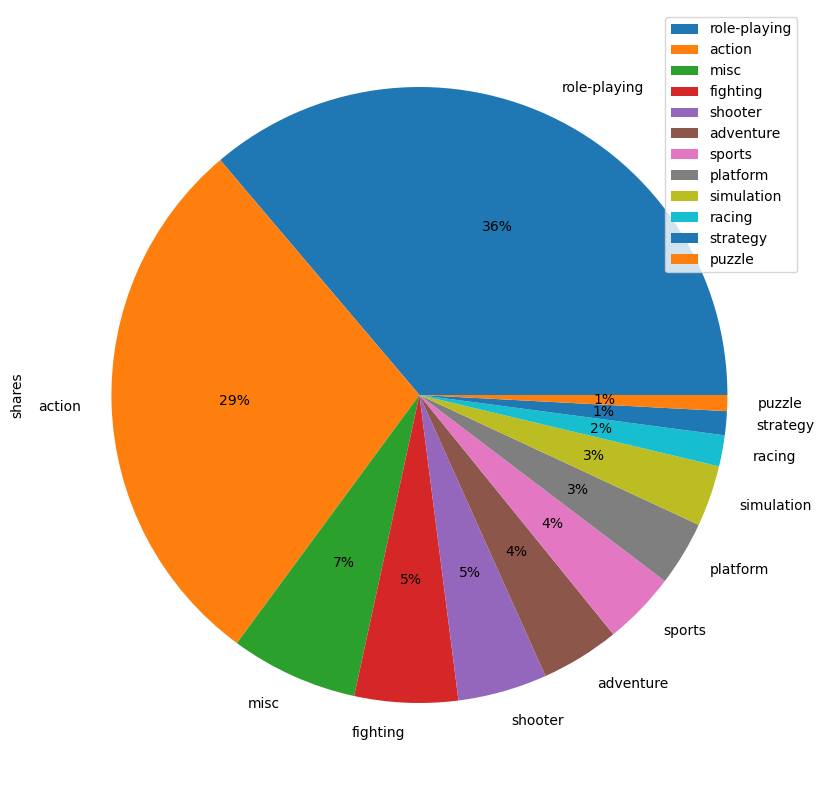

In [65]:
jp_sales_genre.plot(kind='pie', y='shares', figsize=(12,10), autopct='%1.0f%%');

Role playing and action are the most selling genres in Japan.

Now let's see games of which ratings are the most popular in different regions.

## ESRB rating impact

The Entertainment Software Rating Board evaluates a game’s content and assigns an age rating.
These ratings are:
* E - "everyone", the game is suitable for everyone.
* E10+ - means that the game is suitable for everyone from age 10 and up.
* T - "teen", the game is suitable for everyone from age 13 and up.
* M - "mature", the game is suitable for everyone from age 17 and up.
* AO - "adults only", the game is suitable for everyone from age 18 and up.


In [66]:
na_sales_rating = games_from_2013.groupby(['rating']
                                         )['na_sales'].sum().reset_index().sort_values(by='na_sales', 
                                                                                        ascending=False)

na_sales_rating['na_shares'] = round(na_sales_rating['na_sales']/na_sales_rating['na_sales'].sum(),3)
na_sales_rating = na_sales_rating.set_index('rating')

na_sales_rating

,na_sales,na_shares
rating,,
M,175.18,0.400
E,81.71,0.187
unknown,72.54,0.166
E10+,56.38,0.129
T,51.98,0.119


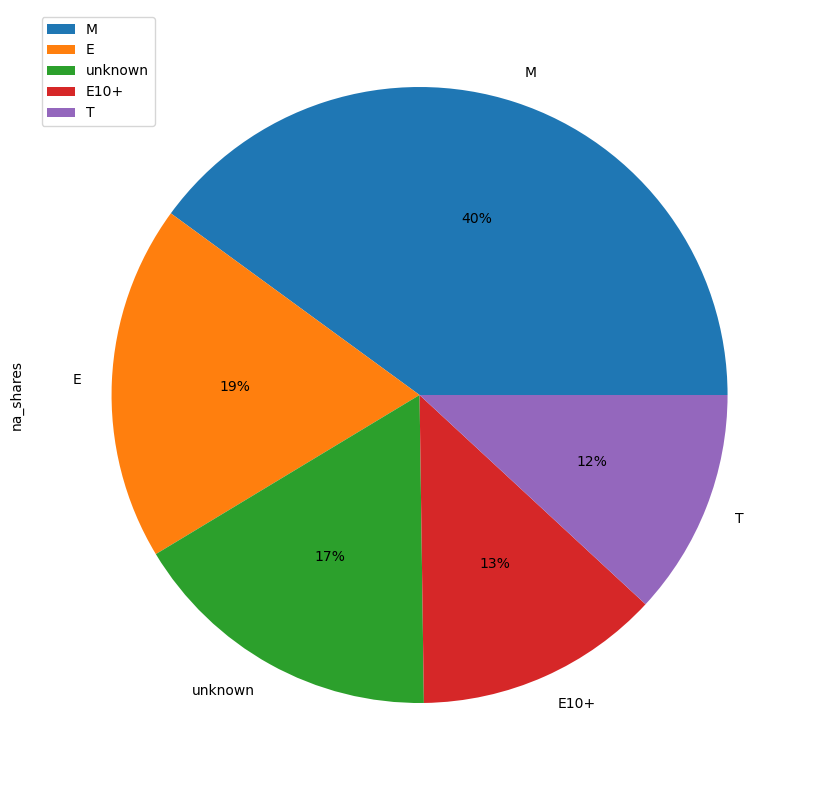

In [67]:
na_sales_rating.plot(kind='pie', y='na_shares', figsize=(12,10), autopct='%1.0f%%');

In [68]:
eu_sales_rating = games_from_2013.groupby(['rating']
                                         )['eu_sales'].sum().reset_index().sort_values(by='eu_sales', 
                                                                                        ascending=False)

eu_sales_rating['eu_shares'] = round(eu_sales_rating['eu_sales']/eu_sales_rating['eu_sales'].sum(),3)
eu_sales_rating = eu_sales_rating.set_index('rating')

eu_sales_rating

,eu_sales,eu_shares
rating,,
M,157.15,0.400
E,85.49,0.218
unknown,61.19,0.156
E10+,45.20,0.115
T,43.68,0.111


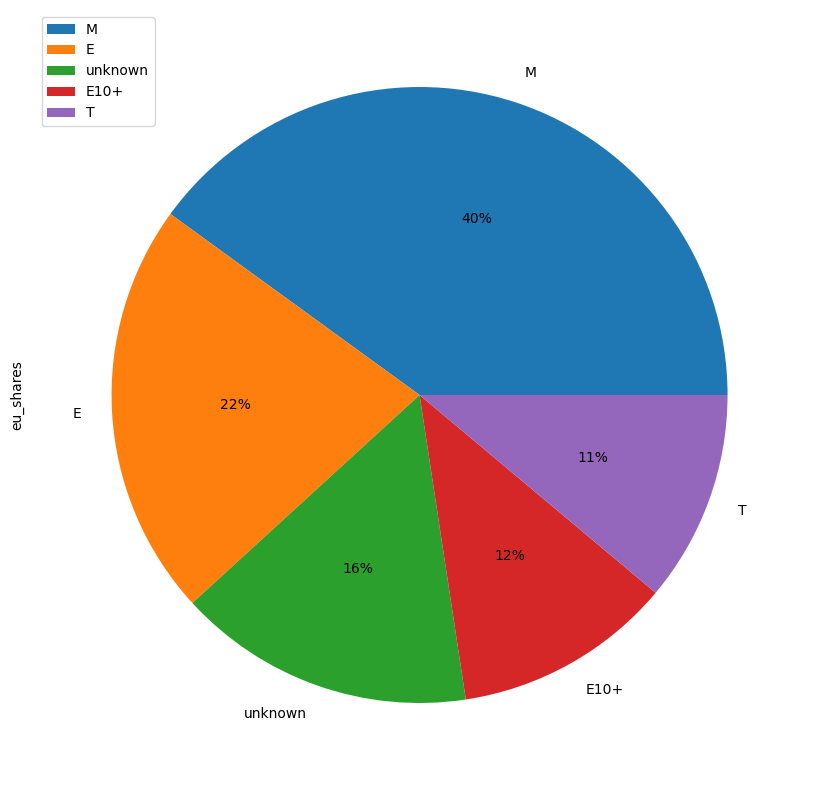

In [69]:
eu_sales_rating.plot(kind='pie', y='eu_shares', figsize=(12,10), autopct='%1.0f%%');

In [70]:
jp_sales_rating = games_from_2013.groupby(['rating']
                                         )['jp_sales'].sum().reset_index().sort_values(by='jp_sales', 
                                                                                        ascending=False)
jp_sales_rating['jp_shares'] = jp_sales_rating['jp_sales']/jp_sales_rating['jp_sales'].sum()
jp_sales_rating = jp_sales_rating.set_index('rating')
jp_sales_rating

,jp_sales,jp_shares
rating,,
unknown,80.82,0.573110
T,22.84,0.161963
E,15.98,0.113317
M,15.11,0.107148
E10+,6.27,0.044462


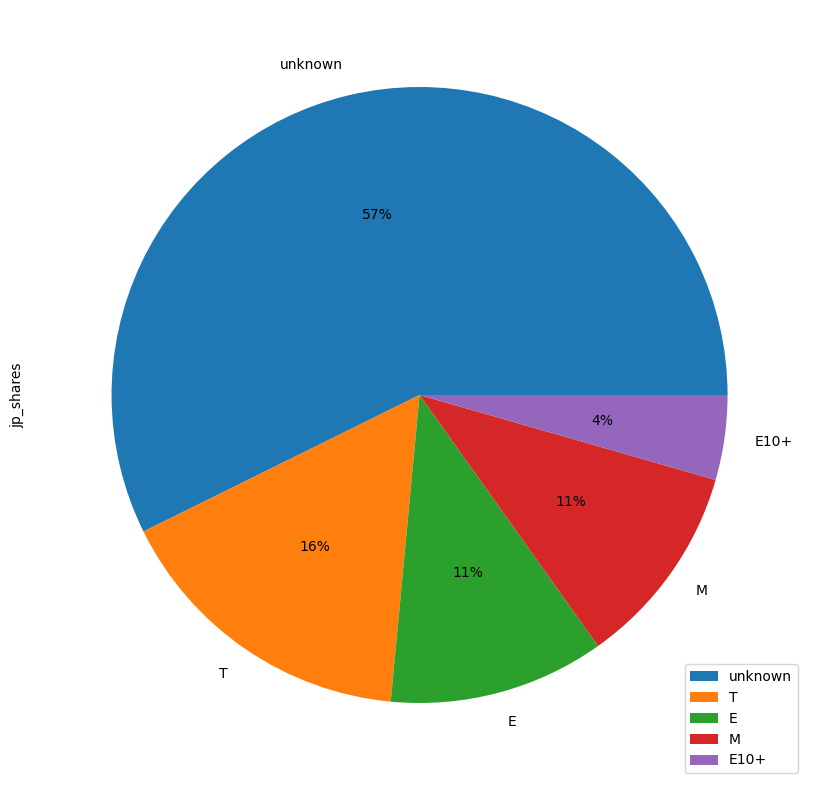

In [71]:
jp_sales_rating.plot(kind='pie', y='jp_shares', figsize=(12,10), autopct='%1.0f%%');

In [72]:
from functools import reduce

In [73]:
data_frames = [na_sales_rating, eu_sales_rating, jp_sales_rating]
rating_merged = reduce(lambda  left,right: pd.merge(left,right,on='rating',
                                            how='outer'), data_frames)
rating_merged

,na_sales,na_shares,eu_sales,eu_shares,jp_sales,jp_shares
rating,,,,,,
M,175.18,0.400,157.15,0.400,15.11,0.107148
E,81.71,0.187,85.49,0.218,15.98,0.113317
unknown,72.54,0.166,61.19,0.156,80.82,0.573110
E10+,56.38,0.129,45.20,0.115,6.27,0.044462
T,51.98,0.119,43.68,0.111,22.84,0.161963


### Conclusion

### Profile for North America

1. PS4 is currently the sales leader with a revenue of 108.74 million USD and a market share of almost 25%, while the XOne follows closely behind with 93.12 million USD in revenue and a market share of 21.3%.
2. Action an shooter are leading game genres with a big gap between them and following ganres.
3. Most selling games are with ratings M ("mature content" - 40%) and E ("for everyone" - 18.7%).

### Profile for Europe

1. PS4 sales in Europe is 141 millions USD, almost 36% of the european market share. The next one goes after big gap - PS3 sales in Europe is 67.81 millions USD with 17.3% market share.
2. Action an shooter are also leading game genres with 30% and 22% of EU market shares respectively.
3. Most selling games are also with ratings M (40%) and E (21.8%).

### Profile for Japan

1. Almost half (48%) of the market is taken by 3DS platform with 67.81 millions USD! Then goes PS3 with 23.35 millions USD and 16.6% of the market share.
2. Role playing and action are the most selling genres in Japan.
3. Most selling games (57.3%) don't have a ESRB rating. The next are are T (16%) and E(11%). 

## Testing hypotheses

### Average user ratings of the Xbox One and PC platforms

Let's compare average user ratings of the Xbox One and PC platforms.


In [74]:
from scipy import stats as st

First we need to filter our data so it would contain only relevant data. And we should keep in mind that we a filtering out missing values in `user_score`.

In [75]:
user_score_pc = games_from_2013[(games_from_2013.platform == "PC") & (games_from_2013.user_score.notna())]
user_score_xone = games_from_2013[(games_from_2013.platform == "XOne") & (games_from_2013.user_score.notna())]

In order to accurately conduct statistical t-test for independant samples we need to know if their variances are equal or not. And for doing that we must know if ther distributions are skewed or not. So first let's look at the distributions of user scores for these platforms.

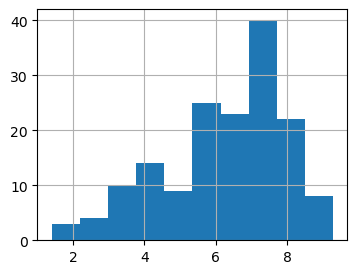

In [76]:
user_score_pc.user_score.hist(figsize=(4,3));

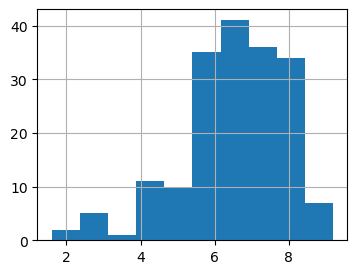

In [77]:
user_score_xone.user_score.hist(figsize=(4,3));

We can see from the graphs that both of the distributions are skewed to the left. Let's check our self.

In [78]:
user_score_pc.user_score.describe()
user_score_xone.user_score.describe()

count    158.000000
mean       6.280380
std        1.735044
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Yes, in both cases median are bigger than mean, so the distributions are indeed are skewed to the left.
So we define center as median value in levene test.

In [79]:
st.levene(user_score_pc['user_score'], user_score_xone['user_score'], center='median')

LeveneResult(statistic=8.304628335799528, pvalue=0.0042072165032298915)

The p-value is small, smaller than a critical statistical significance level, so we decide that the variances of two samples (user score for PC platform games and for XOne platform games) are not equal.

Let's conduct a statistical t-test for independant samples.

First we formulate our hypotheses:

Null hypothesis is "Average user ratings of the Xbox One and PC platforms are the same."

And alternative hypothesis is "Average user ratings of the Xbox One and PC platforms are not the same"

We set a critical statistical significance level at 0.05

In [80]:
alpha = 0.05

results = st.ttest_ind(user_score_pc['user_score'], user_score_xone['user_score'], equal_var = False)

print(results)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
user_score_pc_mean = user_score_pc.user_score.mean()
print('Average user score for games on PC', user_score_pc_mean)
user_score_xone_mean = user_score_xone.user_score.mean()
print('Average user score for games on XOne', user_score_xone_mean)

Ttest_indResult(statistic=-1.4027031463010626, pvalue=0.16174359801784316)
We can't reject the null hypothesis
Average user score for games on PC 6.2803797468354405
Average user score for games on XOne 6.52142857142857


Based on our calculated p-value being greater than the critical statistical significance level that we have set, we cannot reject the null hypothesis. 

This means that there is an 16% probability that the similarity between the two datasets is not coincidental.

### Average user ratings for the Action and Sports genres

Let's compare average user ratings for the Action and Sports genres.

First we need to filter our data so it would contain only relevant data. And we should keep in mind that we a filtering out missing values in `user_score`.

In [81]:
user_score_action = games_from_2013[(games_from_2013.genre == "action") & (games_from_2013.user_score.notna())]
user_score_sports = games_from_2013[(games_from_2013.genre == "sports") & (games_from_2013.user_score.notna())]

In order to accurately conduct statistical t-test for independant samples we need to know if their variances are equal or not. And for doing that we must know if ther distributions are skewed or not. So first let's look at the distributions of user scores for these platforms.

In [82]:
user_score_action.user_score.describe()
user_score_sports.user_score.describe()

count    392.000000
mean       6.837500
std        1.329076
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

And here is also in both cases median are bigger than mean, so the distributions are also are skewed to the left.
So we define center as median value in levene test.

In [83]:
st.levene(user_score_action['user_score'], user_score_sports['user_score'], center='median')

LeveneResult(statistic=26.209600615273317, pvalue=4.241765365098557e-07)

p-value of levene test is a really small number so we decide that the variances of two samples (user score for action games and for sports games) are not equal. 

Let's conduct a statistical t-test for independant samples.

First we formulate our hypotheses:

Null hypothesis is "Average user ratings for the Action and Sports genres are the same."

And alternative hypothesis is "Average user ratings for the Action and Sports genres are not the same."

We set a critical statistical significance level at 0.05

In [84]:
alpha = 0.05

results = st.ttest_ind(user_score_action['user_score'], user_score_sports['user_score'], equal_var = False)

print(results)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
user_score_action_mean = user_score_action.user_score.mean()
print('Average user score for games of action genre', user_score_action_mean)
user_score_sports_mean = user_score_sports.user_score.mean()
print('Average user score for games of sport genre', user_score_sports_mean)

Ttest_indResult(statistic=10.242085476872317, pvalue=1.3883444596405356e-20)
We reject the null hypothesis
Average user score for games of action genre 6.837500000000005
Average user score for games of sport genre 5.238124999999999


We reject the null hypothesis because calculated pvalue is smaller than a critical statistical significance level and state that average user ratings for the Action and Sports genres are different.

## General conclusion


This project main goal is to identify patterns that could determine whether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.

During data analysis process, we encountered several challenges that had to be addressed to ensure the analysis could be carried out effectively. The most significant challenge was the substantial amount of missing data in columns that described various types of scores, such as user and critic scores. 

They had an extensive amount of missing data - 54.5% (user score) and 51.3% (critic score). 
Removing these rows was not an option as it would result in the loss of a significant portion of the data. However, attempting to accurately fill in the missing values was also impossible, as we cannot predict the evaluations given by users on different platforms or by critics.

We should consult with data engineers to investigate whether data loss occurred somewhere in the pipeline or if the scores data was not collected for some older games.

After several stages of data prerpocessing we started our analysis.

We observed how the number of games has evolved throughout the years, and identified four distinct phases:
* From 1980 to 1994, the gaming industry was in its early stages of development and number of games was relatively low.
* From 1995 to 2001, number of games began to increase steadily.
* From 2002 to 2011, there was a significant peak.
* From 2012 to 2016, number of games decreased by half and remained relatively stable for several years.

We highlighted most profitable platforms of all times and in different periods:
* PS2, X360, PS3, Wii, DS, PS - top 6 platforms in sales of all times
* PS2 and Wii - most profitable platforms in 2002-2016
* PS4, PS3, X360, 3DS and XOne - most profitable platforms in 2013-2016.

We looked at lifecycles of platform and ploted a graghs showing it. 
We calculated average lifespan for a platform - 6 years - and observed that it takes from 1 to 3 years for the platform to reach its peak in sales.

In order to make a prognosis for 2017 we decided to closely analyse the data starting from 2013 - to look at rising and fading trends and define factors that could help us spot potential winers.

In order to identify those factors we needed to answer following questions:

* On which platform most profitable games are sold?


For the period 2013-2016 it is X360 (it has the highest median value for the games sold on it). 
However, it's important to note that the sales trend for X360 is currently decreasing, as it's an old platform whose peak sales period has passed. Therefore, even though X360 has the highest median value, it wouldn't be the best choice to invest in games for this platform.
XOne has the second-best median value and is one of the platforms with rising sales. These two factors make it a good option for choosing games to sell.
Third and fourth median values are for WiiU and PS4. We remember that PS4 is not only rising in sales but also generates biggest amount of sales - so games from this platform are potential winners.
WiiU's sales have never been as high as previously discussed platforms, and its tendency right now is decrease in sale but it's still a live platform. So the in the purchase forecast it should be taken into consideration.

* How user and professional reviews affect sales?

It has become apparent that the impact of different scores on game sales is relatively weak, if present at all. The correlation between critic score and total sales on three analyzed platforms (PS4, XOne, and WiiU) is similar, ranging between 38% and 41%. However, this level of correlation cannot be considered a significant factor for sales prognosis.
Despite this, the positive correlation between critic score and total sales could still be considered as an additional factor when choosing games for sale in 2017.
On the other hand, the correlation between user score and total sales is absent for two out of the three analyzed platforms (PS4 and XOne), and relatively weak for WiiU (40%). While this correlation cannot be considered an essential factor in sales prognosis, it is still worth keeping in mind.


It is crucial to note that these conclusions about different types of scores are based on approximately 60% of the available data on these platforms, as a significant amount of data has missing values for both types of scores. Analysis could lead to very different conclusoins if the data was whole.


* Games of which genre are the most profitable? 

According to the data, the Shooter genre is in the lead with a median value that is twice as large as the next genre, at almost 1.2 million USD. It means that the games on this genre are the most profitable. Additionally, Shooter games are the second in terms of total sales. Even though the number of shooter games is relatively small their profitability is impressive - we can rely on it when making a prognosis.
Platform games come in second place after Shooter, but their number and amount of sales are relatively small.
Following platform, the sport genre is next with a median value of 0.53 million and it is included in the top 5 for both the number of sold games and total sales - it would be a good idea to consider it as a factor for our prognosis.
And let's not forget about action games - even tough their profitability is not the greatest, it's still most popular genre that generates more revenue.


Also we create a profile for each region

Profile for North America

PS4 is currently the sales leader with a revenue of 108.74 million USD and a market share of almost 25%, while the XOne follows closely behind with 93.12 million USD in revenue and a market share of 21.3%.
Action an shooter are leading game genres with a big gap between them and following ganres.
Most selling games are with ratings M ("mature content" - 40%) and E ("for everyone" - 18.7%).

Profile for Europe

PS4 sales in Europe is 141 millions USD, almost 36% of the european market share. The next one goes after big gap - PS3 sales in Europe is 67.81 millions USD with 17.3% market share.
Action an shooter are also leading game genres with 30% and 22% of EU market shares respectively.
Most selling games are also with ratings M (40%) and E (21.8%).

Profile for Japan

Almost half (48%) of the market is taken by 3DS platform with 67.81 millions USD! Then goes PS3 with 23.35 millions USD and 16.6% of the market share.
Role playing and action are the most selling genres in Japan.
Most selling games (57.3%) don't have a ESRB rating. The next are are T (16%) and E(11%).

And in the end we carried out two comparison:

1. Average user ratings of the Xbox One and PC platforms.
2. Average user ratings for the Action and Sports genres. 

In the first case we coudn't reject the null hypothesis and based on the result of a t-test stated that there is a 16% probability that the similarity between the average user ratings of the Xbox One and average user ratings of PC platforms is not coincidental.

And in the second case we rejected the null hypothesis because calculated pvalue was smaller than a critical statistical significance level and stated that average user ratings for the Action and Sports genres are different.
